<a href="https://www.kaggle.com/code/ibtesamfatma/eda-feature-engg-dt-model?scriptVersionId=183359935" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-risk-customers/credit_customers.csv


1. Importing Libraries

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 

In [4]:
df= pd.read_csv('/kaggle/input/credit-risk-customers/credit_customers.csv')
df.head(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
5,no checking,36.0,existing paid,education,9055.0,no known savings,1<=X<4,2.0,male single,none,...,no known property,35.0,none,for free,1.0,unskilled resident,2.0,yes,yes,good
6,no checking,24.0,existing paid,furniture/equipment,2835.0,500<=X<1000,>=7,3.0,male single,none,...,life insurance,53.0,none,own,1.0,skilled,1.0,none,yes,good
7,0<=X<200,36.0,existing paid,used car,6948.0,<100,1<=X<4,2.0,male single,none,...,car,35.0,none,rent,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
8,no checking,12.0,existing paid,radio/tv,3059.0,>=1000,4<=X<7,2.0,male div/sep,none,...,real estate,61.0,none,own,1.0,unskilled resident,1.0,none,yes,good
9,0<=X<200,30.0,critical/other existing credit,new car,5234.0,<100,unemployed,4.0,male mar/wid,none,...,car,28.0,none,own,2.0,high qualif/self emp/mgmt,1.0,none,yes,bad


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [6]:
categorical_cols = [col for col in df.columns if df[col].dtype == "O"]

for i in categorical_cols:
    print(df[i].value_counts())

checking_status
no checking    394
<0             274
0<=X<200       269
>=200           63
Name: count, dtype: int64
credit_history
existing paid                     530
critical/other existing credit    293
delayed previously                 88
all paid                           49
no credits/all paid                40
Name: count, dtype: int64
purpose
radio/tv               280
new car                234
furniture/equipment    181
used car               103
business                97
education               50
repairs                 22
domestic appliance      12
other                   12
retraining               9
Name: count, dtype: int64
savings_status
<100                603
no known savings    183
100<=X<500          103
500<=X<1000          63
>=1000               48
Name: count, dtype: int64
employment
1<=X<4        339
>=7           253
4<=X<7        174
<1            172
unemployed     62
Name: count, dtype: int64
personal_status
male single           548
female div/dep/ma

In [7]:
def stack_graph(i):
    stack_grp = df.groupby([i, 'class']).size().unstack(fill_value=0)
    stack_grp['Total'] = stack_grp['bad']+stack_grp['good']
    stack_grp['bad%'] = stack_grp['bad'] /stack_grp['Total']*100
    stack_grp['bad%'] = stack_grp['bad%'].round(0)
    stack_grp['good%'] = stack_grp['good'] /stack_grp['Total']*100
    stack_grp['good%'] = stack_grp['good%'].round(0)
    stack_grp.drop(columns = ['bad','good','Total'], inplace=True)
    return stack_grp.plot(kind='bar', stacked=True ,  figsize=(3,3))

<Axes: xlabel='checking_status'>

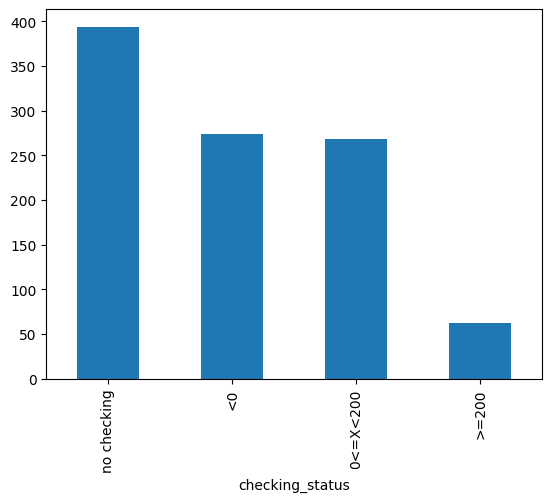

In [11]:
df['checking_status'].value_counts().plot(kind = 'bar')

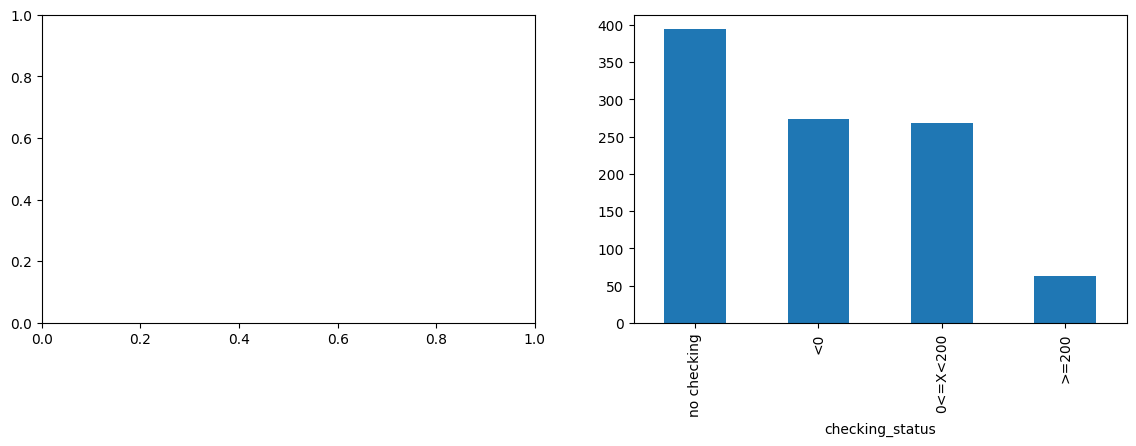

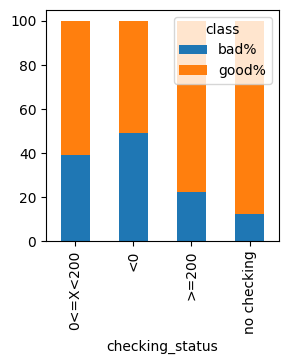

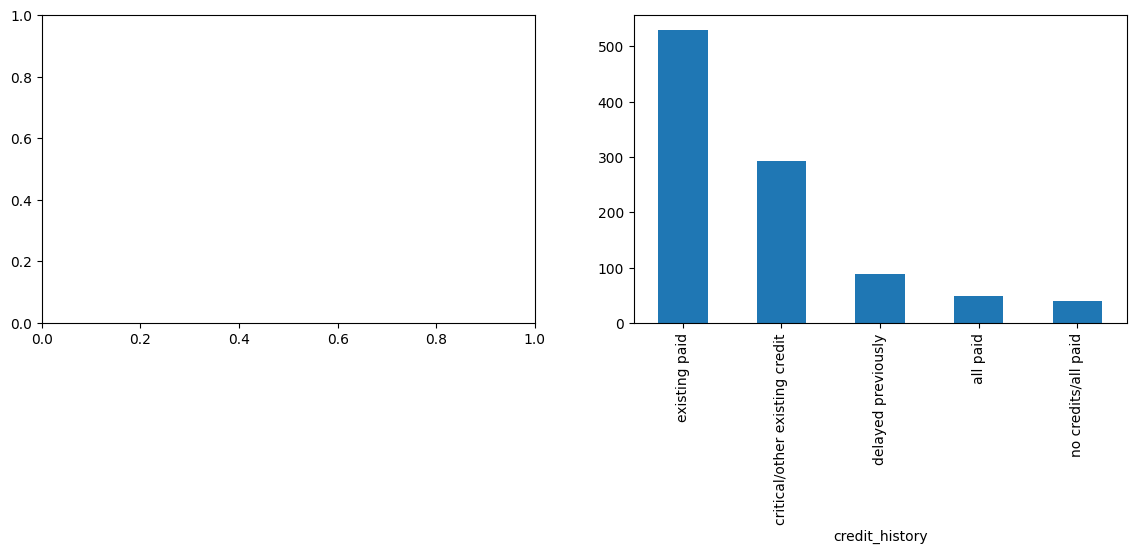

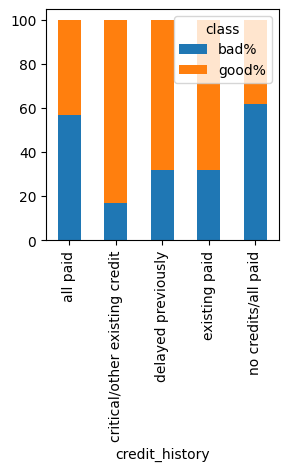

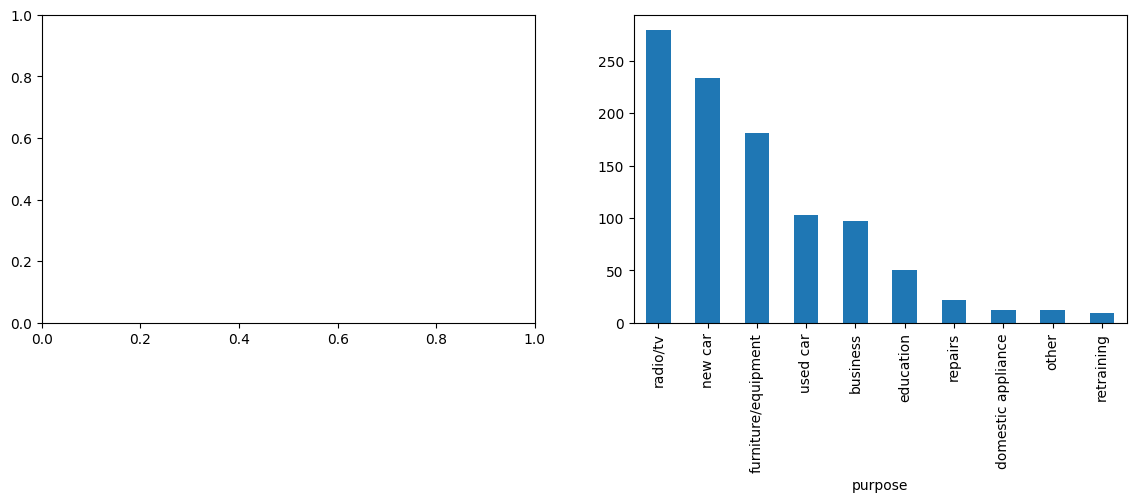

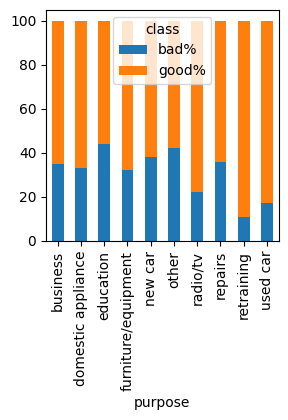

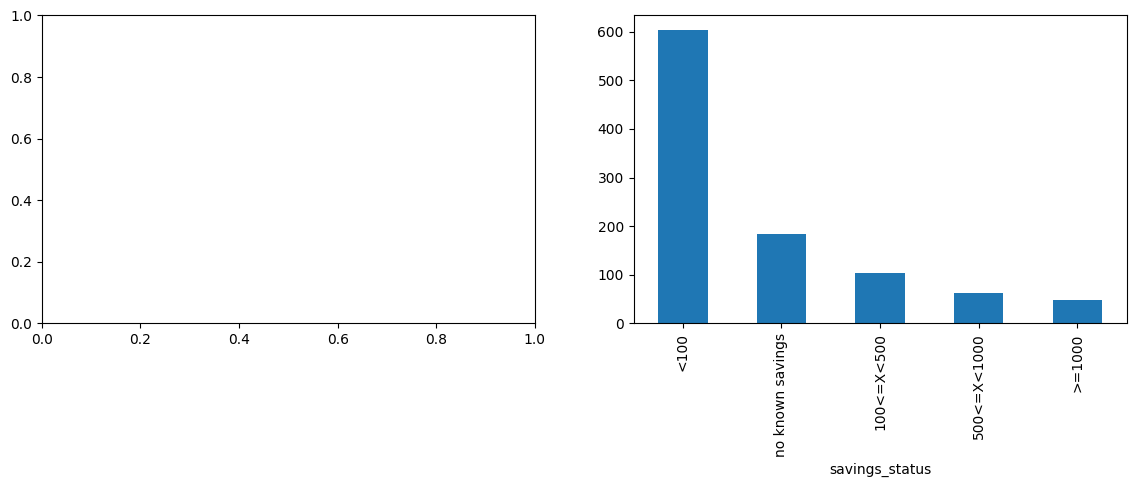

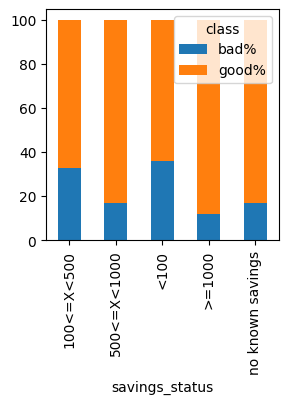

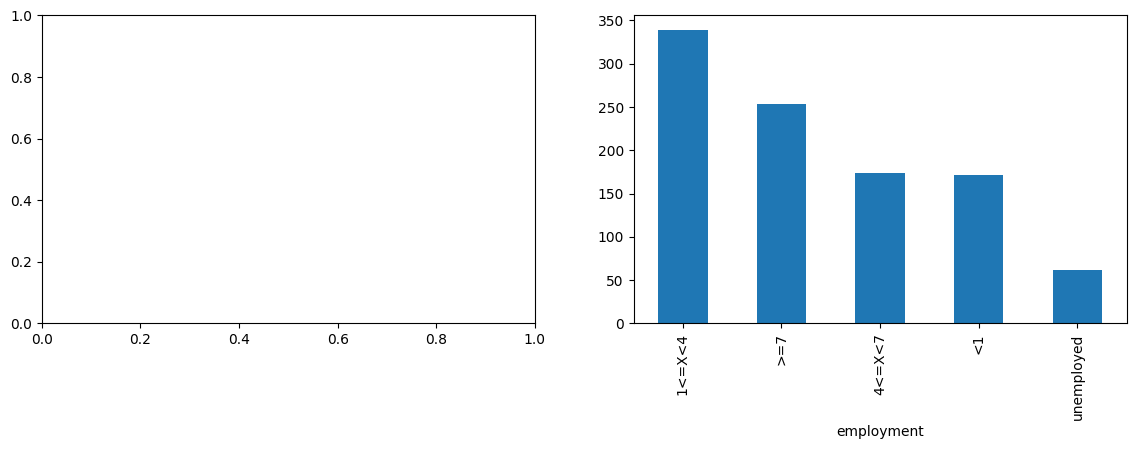

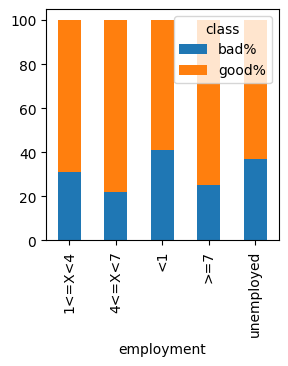

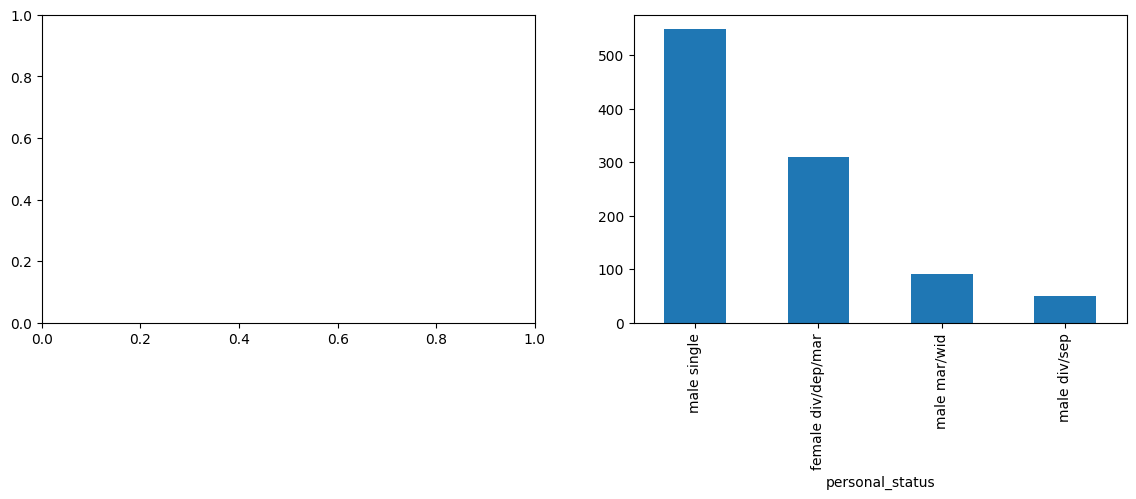

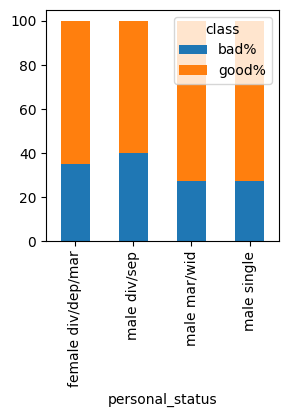

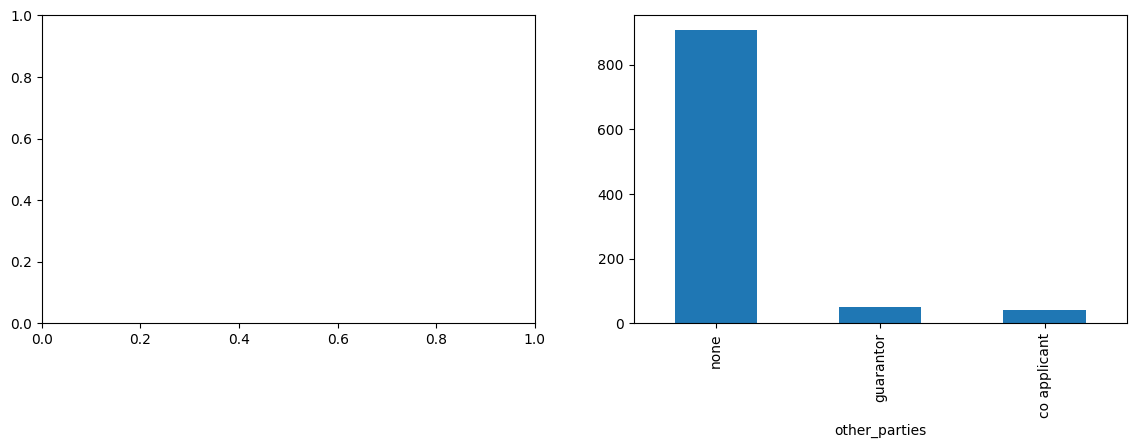

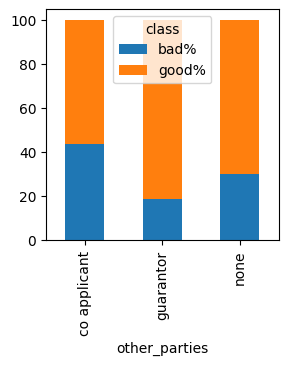

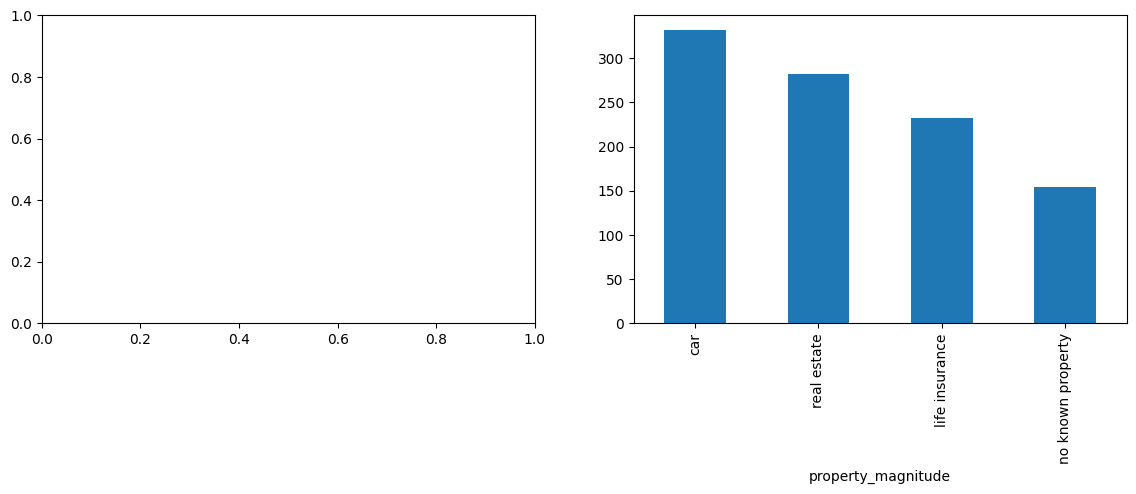

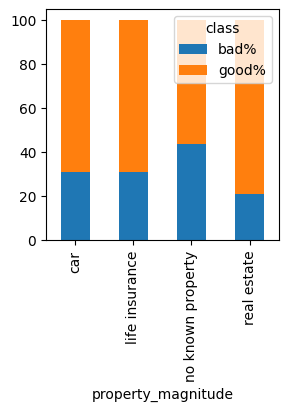

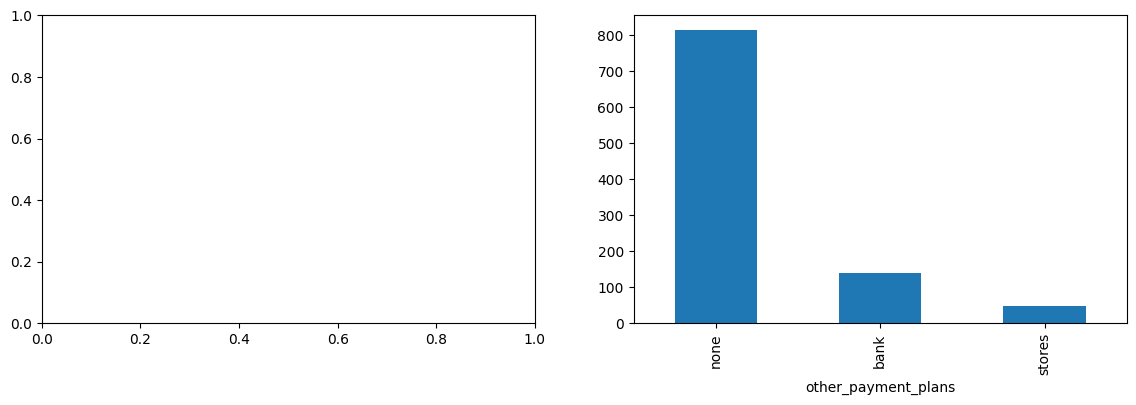

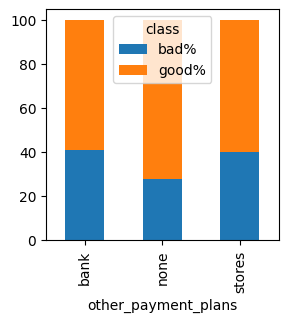

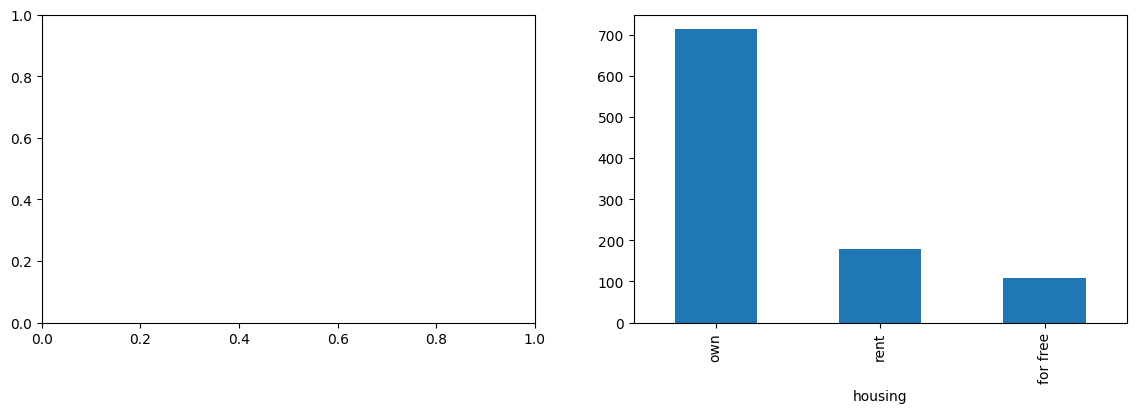

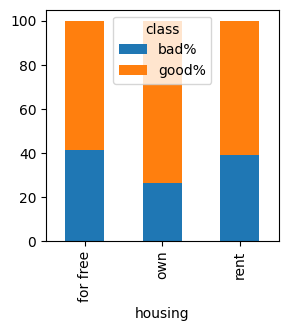

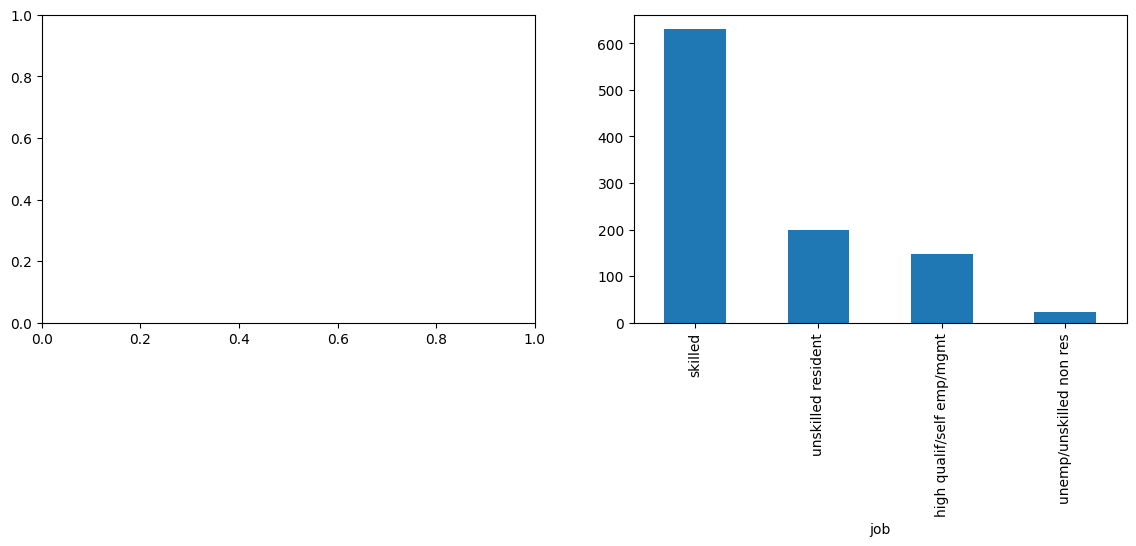

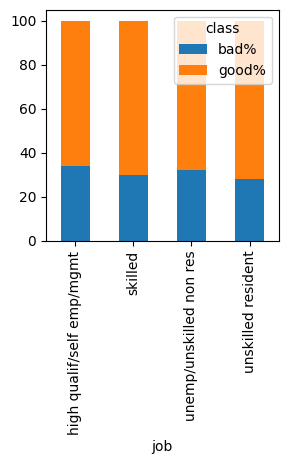

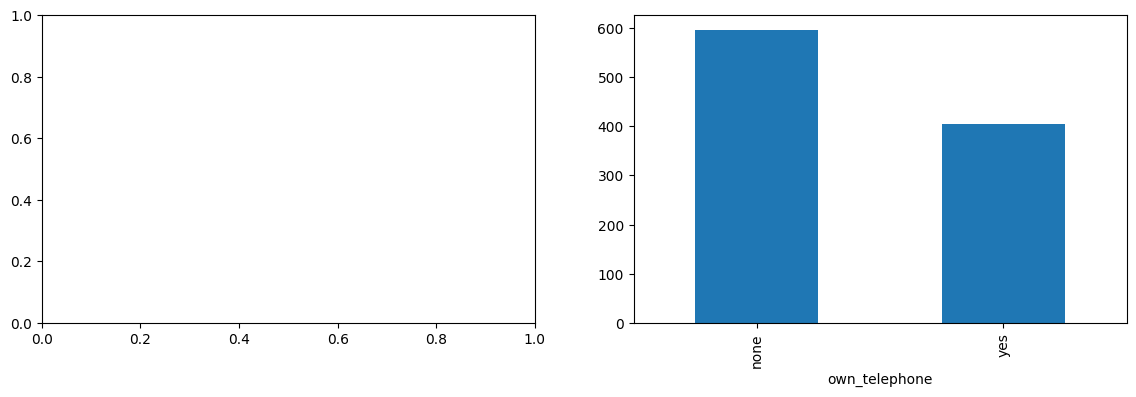

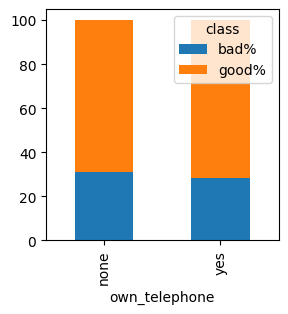

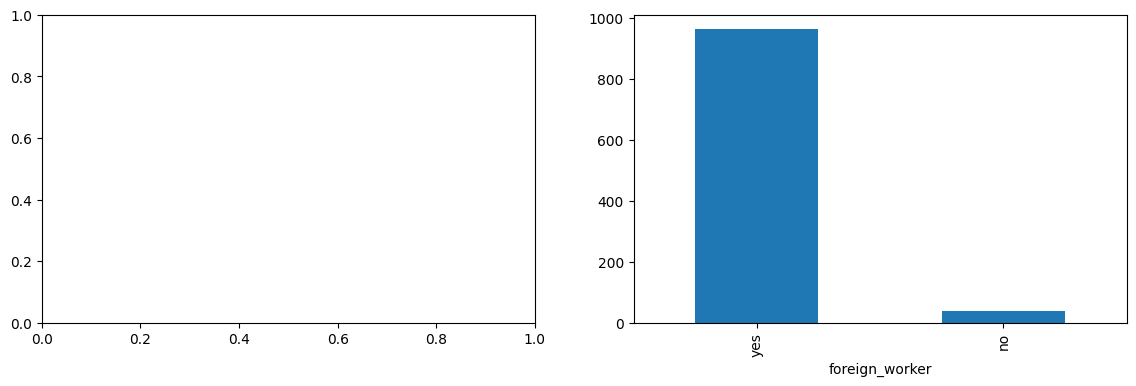

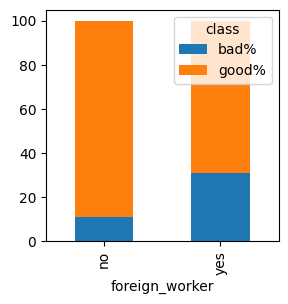

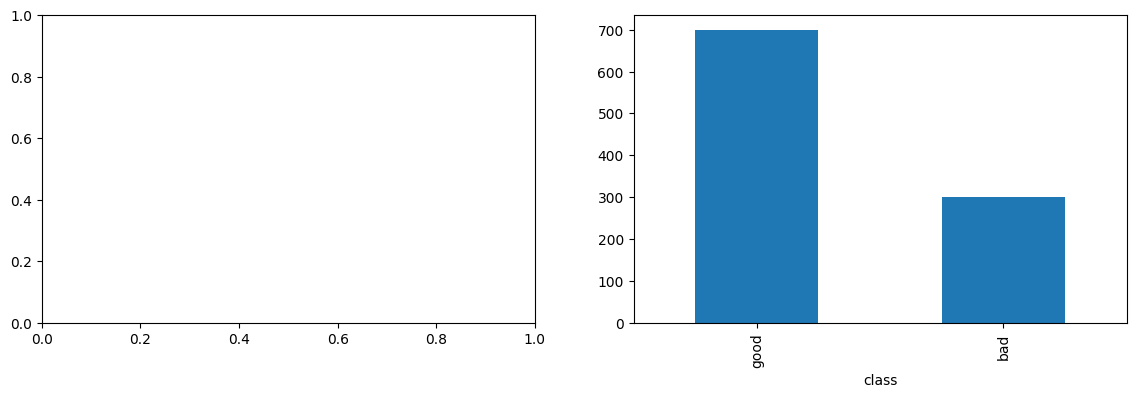

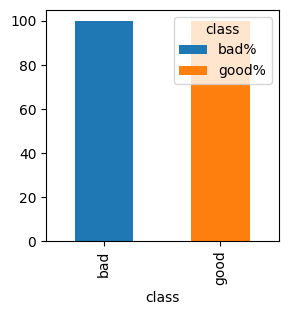

In [15]:
categorical_cols = [col for col in df.columns if df[col].dtype == "O"]
for i in categorical_cols:
    plt.figure(figsize =(14,4))
    
    plt.subplot(122)
    df[i].value_counts().plot(kind = 'bar')
    
    plt.subplot(121)
    stack_graph(i)  
    
    plt.show()
    
    

<Axes: xlabel='installment_commitment'>

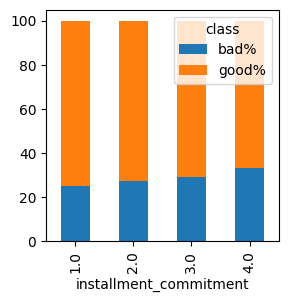

In [9]:
stack_graph('installment_commitment')

<Axes: xlabel='existing_credits'>

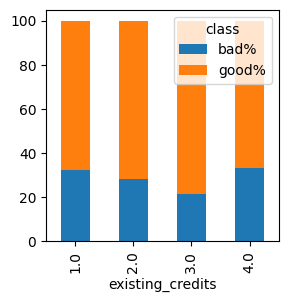

In [10]:
stack_graph('existing_credits')

<Axes: xlabel='num_dependents'>

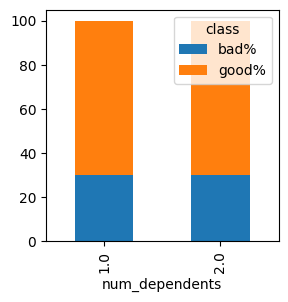

In [11]:
stack_graph('num_dependents')

In [12]:
def kde_plot(i):
    
    sns.kdeplot(df[df['class']=='good'][i],color = 'green')
    sns.kdeplot(df[df['class']=='bad'][i],color='red')
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


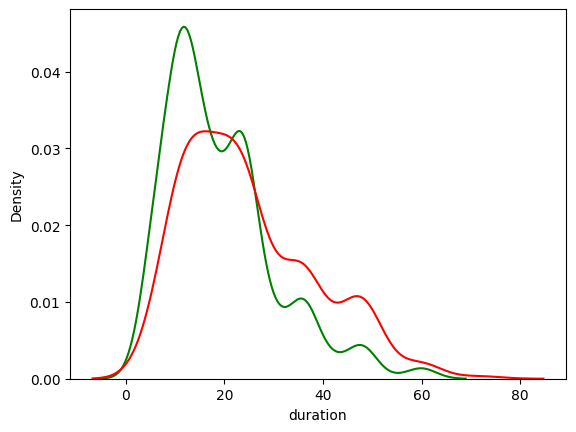

None


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


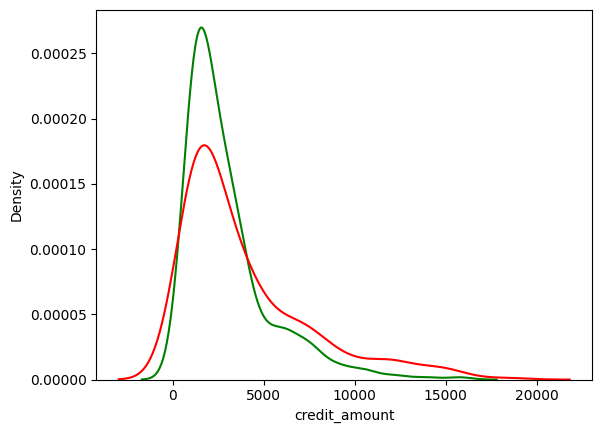

None


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


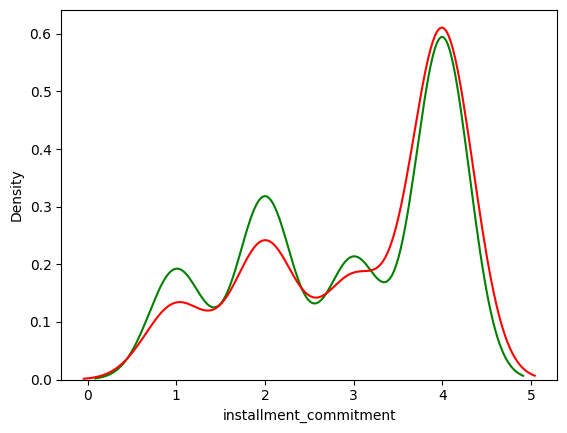

None


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


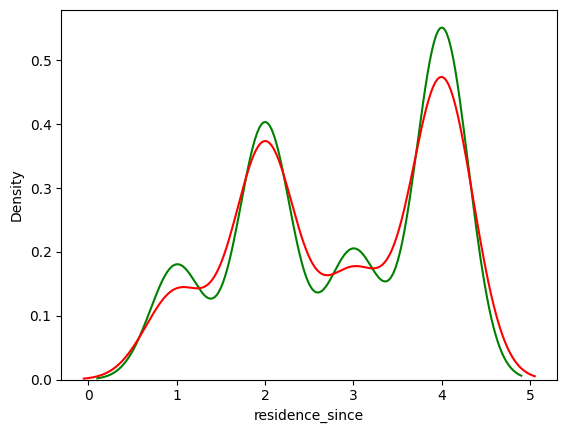

None


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


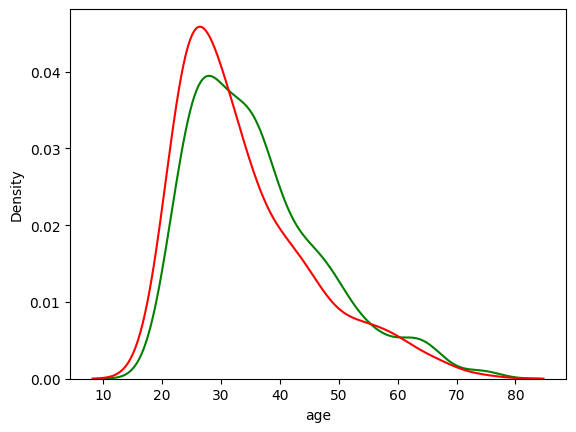

None


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


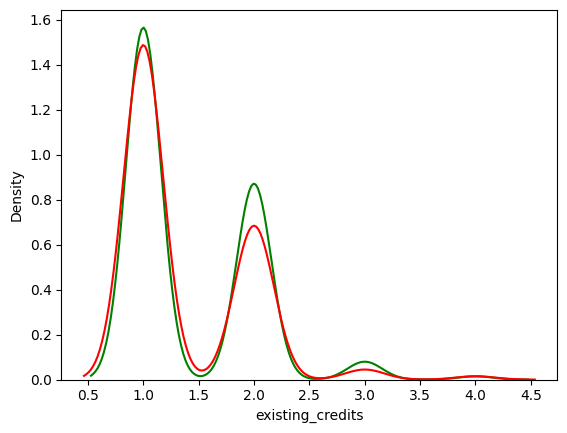

None


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


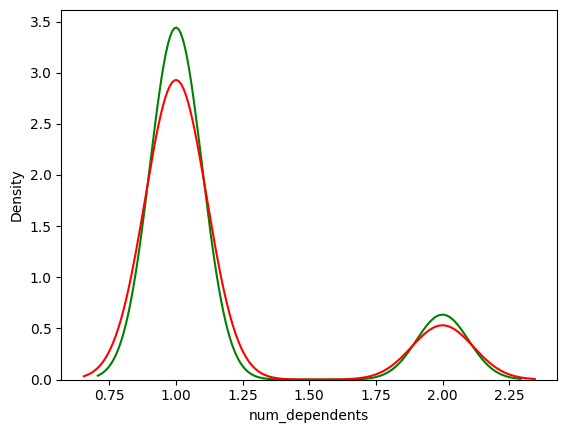

None


In [13]:
numerica_col = [col for col in df.columns if df[col].dtype != "O"]

for i in numerica_col:
    result = kde_plot(i)
    
    print(result)

In [14]:
df.head(2)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad


In [15]:
label_encoder_class = LabelEncoder()
df['class'] = label_encoder_class.fit_transform(df['class'])
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,1
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,0
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,1
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,1
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,1
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,1
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,1
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,0


In [16]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = 'class'), df['class'], test_size=0.2, random_state=42, stratify=df['class'])
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800, 20)
X_test shape: (200, 20)
y_train shape: (800,)
y_test shape: (200,)


In [17]:
y_train.value_counts()

class
1    560
0    240
Name: count, dtype: int64

In [18]:
categorical_cols = [col for col in df.columns if df[col].dtype == "O"]

for i in categorical_cols:
    print(df[i].value_counts())

checking_status
no checking    394
<0             274
0<=X<200       269
>=200           63
Name: count, dtype: int64
credit_history
existing paid                     530
critical/other existing credit    293
delayed previously                 88
all paid                           49
no credits/all paid                40
Name: count, dtype: int64
purpose
radio/tv               280
new car                234
furniture/equipment    181
used car               103
business                97
education               50
repairs                 22
domestic appliance      12
other                   12
retraining               9
Name: count, dtype: int64
savings_status
<100                603
no known savings    183
100<=X<500          103
500<=X<1000          63
>=1000               48
Name: count, dtype: int64
employment
1<=X<4        339
>=7           253
4<=X<7        174
<1            172
unemployed     62
Name: count, dtype: int64
personal_status
male single           548
female div/dep/ma

In [19]:
trf1 = ColumnTransformer([
    ('ord_checking_status',OrdinalEncoder(categories=[['no checking','<0','0<=X<200','>=200']]),[0]),
    ('ord_savings_status',OrdinalEncoder(categories=[['no known savings','<100','100<=X<500','500<=X<1000','>=1000']]),[5]),
    ('ord_employment',OrdinalEncoder(categories=[['unemployed','<1','1<=X<4','4<=X<7','>=7']]),[6]),
],remainder ='passthrough'
)

In [20]:
trf1

ColumnTransformer(remainder='passthrough',
                  transformers=[('ord_checking_status',
                                 OrdinalEncoder(categories=[['no checking',
                                                             '<0', '0<=X<200',
                                                             '>=200']]),
                                 [0]),
                                ('ord_savings_status',
                                 OrdinalEncoder(categories=[['no known savings',
                                                             '<100',
                                                             '100<=X<500',
                                                             '500<=X<1000',
                                                             '>=1000']]),
                                 [5]),
                                ('ord_employment',
                                 OrdinalEncoder(categories=[['unemployed', '<1',
                                                             '1<=X<4', '4<=X<7',
                                                             '>=7']]),
                                 [6])])

In [21]:
for i in df.columns:
    print(f"{i}",df.columns.get_loc(i),df[i].dtype)

checking_status 0 object
duration 1 float64
credit_history 2 object
purpose 3 object
credit_amount 4 float64
savings_status 5 object
employment 6 object
installment_commitment 7 float64
personal_status 8 object
other_parties 9 object
residence_since 10 float64
property_magnitude 11 object
age 12 float64
other_payment_plans 13 object
housing 14 object
existing_credits 15 float64
job 16 object
num_dependents 17 float64
own_telephone 18 object
foreign_worker 19 object
class 20 int64


In [22]:
trf2 = ColumnTransformer([
    ('OHE_enco',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),[2,3,8,9,11,13,14,16,18,19])
])

In [23]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2)
])

pipe.fit(X_train)

X_train_transformed = pipe.transform(X_train)
X_test_transformed = pipe.transform(X_test)

In [24]:
pipe.named_steps['trf2'].transformers_

[('OHE_enco',
  OneHotEncoder(handle_unknown='ignore', sparse_output=False),
  [2, 3, 8, 9, 11, 13, 14, 16, 18, 19]),
 ('remainder', 'drop', [0, 1, 4, 5, 6, 7, 10, 12, 15, 17])]

In [25]:
pipe.named_steps['trf1'].transformers_

[('ord_checking_status',
  OrdinalEncoder(categories=[['no checking', '<0', '0<=X<200', '>=200']]),
  [0]),
 ('ord_savings_status',
  OrdinalEncoder(categories=[['no known savings', '<100', '100<=X<500',
                              '500<=X<1000', '>=1000']]),
  [5]),
 ('ord_employment',
  OrdinalEncoder(categories=[['unemployed', '<1', '1<=X<4', '4<=X<7', '>=7']]),
  [6]),
 ('remainder',
  'passthrough',
  [1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])]

In [26]:
X_train_transformed

array([[0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [27]:
has_string = any(isinstance(x, str) for x in X_train_transformed)
has_string

False

In [28]:
y_train.value_counts()

class
1    560
0    240
Name: count, dtype: int64

In [29]:
model = DecisionTreeClassifier(max_depth=5)

In [30]:
model.fit(X_train_transformed, y_train)

DecisionTreeClassifier(max_depth=5)

In [31]:
y_pred = model.predict(X_test_transformed)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:", accuracy)

Accuracy: 0.685
